# Expe 1, noise tagging condition, individual analysis of participant A1

In [31]:
data_path = '/home/lea/Documents/obsidian_notes/masterADS/ads_thesis_RIFT/my_code_expe1'
trial_info_file = '/data/A1/converted/trialinfo_matrix_A1_cleanedtrials.mat'
data_file = '/data/A1/Experimental/data.mat'
epoch_file = '/epochs_from_matrix/epochs_1.fif'

# Posterior electrodes
relevant_electrodes = ['O2','PO4','PO8','P8','P4','P6','P2','P1','P3','P5','P7','PO7','PO3','O1','Pz','POz','Oz','Iz'] 
# Best electrodes in frequency tagging condition
freqtag_electrodes = ['Iz', 'PO3', 'POz', 'P3', 'P7', 'P5']

# Dic to index trial_info matrix
info_colnames = {'0':0 ,'1':1 ,'RT':2,'PTB_check_RT_error':3, 'answer':4,'stimuli_target_interval':5,\
                      'base_delay':6, 'flicker_sides':7, 'cued_side':8, 'orients_L':9, 'orients_r':10,\
                      'ignore_column':11, 'target_angle':12, 'tagging_type':13, 'trial_number':14}

In [32]:
import scipy.io as sio
import scipy
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import mne
from mne.time_frequency import EpochsTFRArray
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from noise_tagging_funs import normalize_per_trial, generate_noise_periods, cross_cor_nois, bin_to_dataframe

In [33]:
# Load trial info
f = sio.loadmat(f'{data_path}{trial_info_file}')
trial_info = f['all_info']

# Get target binary (i.e if a shift happened)
f = sio.loadmat(f'{data_path}{data_file}')
target_binary =f['data']['targets_binary'][0][0]
# Remove practice trials
target_binary = target_binary[1:,:]
# Collapse to trial indexes
original_shape = target_binary.shape
new_shape = (original_shape[0] * original_shape[1],) + original_shape[2:]
target_binary = np.reshape(target_binary, new_shape)
target_binary = pd.DataFrame({'trial_number':np.arange(target_binary.shape[0]), 'target_binary':target_binary})

# Create pd df to pass to mne metadata
pd_info = pd.DataFrame(trial_info, columns=info_colnames.keys())
pd_info['trial_number']= pd_info['trial_number'].astype(int) - 1
pd_info = pd.merge(pd_info, target_binary, on = 'trial_number')

# Load eeg epochs .fif and add metadata
epochs = mne.read_epochs(f'{data_path}{epoch_file}')
epochs.metadata = pd_info


Reading /home/lea/Documents/obsidian_notes/masterADS/ads_thesis_RIFT/my_code_expe1/epochs_from_matrix/epochs_1.fif ...


/tmp/ipykernel_15649/448556551.py:22: RuntimeWarning: This filename (/home/lea/Documents/obsidian_notes/masterADS/ads_thesis_RIFT/my_code_expe1/epochs_from_matrix/epochs_1.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(f'{data_path}{epoch_file}')


    Found the data of interest:
        t =   -1000.00 ...    2299.32 ms
        0 CTF compensation matrices available
Not setting metadata
428 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 16 columns


In [34]:
# Keep only posterior electrodes
epochs.pick_channels(relevant_electrodes)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Number of events,428
Events,1: 428
Time range,-1.000 – 2.299 s
Baseline,off


In [35]:
epochs_noistag = epochs['tagging_type==1'].copy()
# bandpass (60-80Hz) EEG data 
epochs_noistag.filter(l_freq=60, h_freq = 80, verbose=True)
# Access noise tags
f = sio.loadmat(f'{data_path}{data_file}')
noise_stims = f['data']['noise_stims'][0][0] # block x trial x sequences (L or R tag) x timepoints
# Filter out practice trials
noise_stims = noise_stims[1:,:,:,:]

Setting up band-pass filter from 60 - 80 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 60.00
- Lower transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 52.50 Hz)
- Upper passband edge: 80.00 Hz
- Upper transition bandwidth: 20.00 Hz (-6 dB cutoff frequency: 90.00 Hz)
- Filter length: 451 samples (0.220 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    1.1s


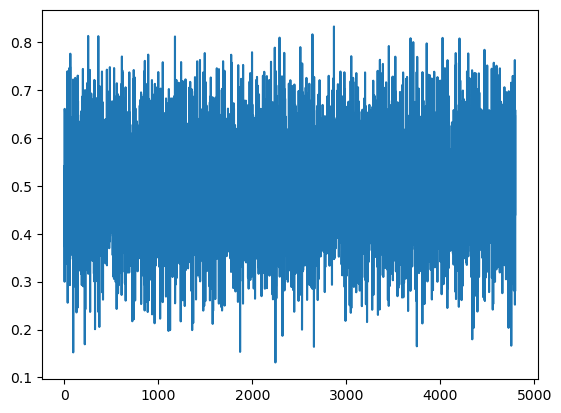

In [36]:
# First noise tag at block 15 trial 32
plt.plot((noise_stims[14,31,0,:].T+noise_stims[14,31,1,:].T)/2)
# NB : tag 1 was always displayed on the left and tag 2 on the right

In [37]:
# Collapse to trial indexes
original_shape = noise_stims.shape
new_shape = (original_shape[0] * original_shape[1],) + original_shape[2:]
noise_stims_tr = np.reshape(noise_stims, new_shape)

In [38]:
noise_stims_tr.shape

(480, 2, 4800)

## 1. Cross-correlation of the cued and uncued tags (tag duration from 0 to 1s)

The EEG from -1 to 2s is correlated with the tags from 0 to 1s (positive time lag up to 1000ms). 
Only trials without targets are included. 
The EEG is correlated with each tag.
The electrodes used are the best from the frequency tagging condition.

Text(0, 0.5, 'Cor EEG/tag')

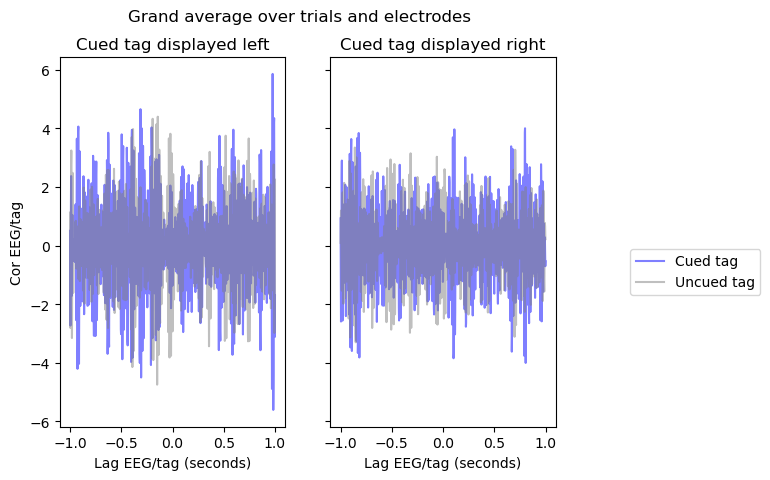

In [39]:
sfreq = 480 # EEG and tag 
tmin_eeg, tmax_eeg = -1, 2
tmin_noise, tmax_noise = 0, 1

cor_with_cued_for_cuedR, cor_with_uncued_for_cuedR, idx_cuedR, times = \
    cross_cor_nois(epochs_fun = epochs_noistag['target_binary == 0'], noise=noise_stims_tr, \
    display_side_cued_tag = 'right', electrodes = freqtag_electrodes,\
    sampling_freq = sfreq, tmin_eeg=tmin_eeg, tmax_eeg=tmax_eeg, tmin_noise = tmin_noise, tmax_noise = tmax_noise,
    mean_tags = False)

cor_with_cued_for_cuedL, cor_with_uncued_for_cuedL, idx_cuedL, times = \
    cross_cor_nois(epochs_noistag['target_binary == 0'], noise_stims_tr, 'left', electrodes = freqtag_electrodes,\
    sampling_freq = sfreq, tmin_eeg=tmin_eeg, tmax_eeg=tmax_eeg, tmin_noise = tmin_noise, tmax_noise = tmax_noise,
    mean_tags = False)

cor_with_cued = np.concatenate([cor_with_cued_for_cuedR,cor_with_cued_for_cuedL])
cor_with_uncued = np.concatenate([cor_with_uncued_for_cuedR,cor_with_uncued_for_cuedL])


# Plot
fig, ax = plt.subplots(1,2, sharey=True, sharex=True)

ax[0].plot(times,cor_with_cued_for_cuedL.mean(axis=(0,1)).T, color='blue', alpha=.5)
ax[0].plot(times,cor_with_uncued_for_cuedL.mean(axis=(0,1)).T, color='grey', alpha=.5)
ax[1].plot(times,cor_with_cued_for_cuedR.mean(axis=(0,1)).T, color='blue', label='Cued tag', alpha=.5)
ax[1].plot(times,cor_with_uncued_for_cuedR.mean(axis=(0,1)).T, color='grey', label='Uncued tag', alpha=.5)


ax[0].set_title('Cued tag displayed left');
ax[1].set_title('Cued tag displayed right');
plt.suptitle('Grand average over trials and electrodes');

ax[1].legend(bbox_to_anchor = (1.3,0.5))
ax[0].set_xlabel('Lag EEG/tag (seconds)')
ax[1].set_xlabel('Lag EEG/tag (seconds)')
ax[0].set_ylabel('Cor EEG/tag')

In [40]:
# Export for group visualization
# First average over trials, normalize the crosscorrelation, then average over electrodes
cor_with_cued_norm = normalize_per_trial(cor_with_cued.mean(axis=0)).mean(axis=0)
cor_with_uncued_norm = normalize_per_trial(cor_with_uncued.mean(axis=0)).mean(axis=0)

crosscorr_time = pd.DataFrame({'Time':times,
              'Cued':cor_with_cued_norm,
              'Uncued':cor_with_uncued_norm})
crosscorr_time = crosscorr_time.melt(id_vars='Time')
crosscorr_time['Cueing'] = crosscorr_time['variable']
crosscorr_time = crosscorr_time.drop('variable', axis=1)
crosscorr_time.to_csv('files/A1_crosscorr_time.csv')


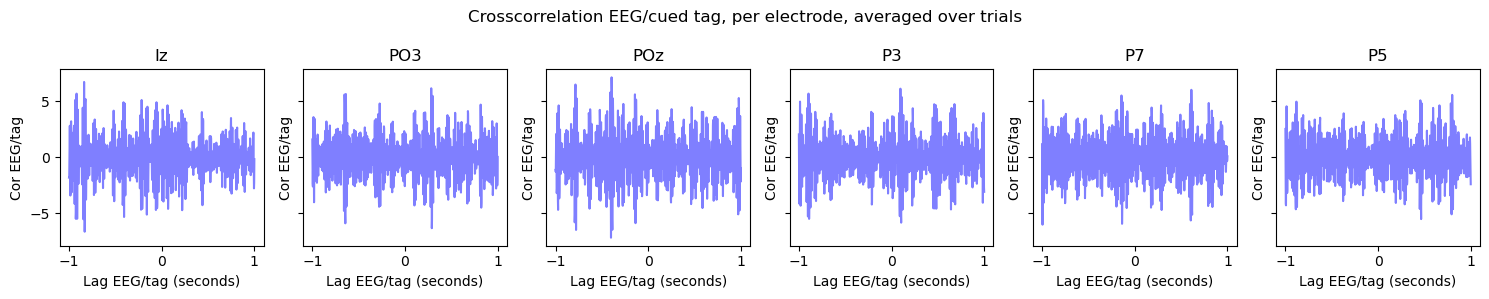

In [41]:
fig, ax = plt.subplots(1,len(freqtag_electrodes), figsize=(15, 3), sharey=True, sharex=True)
for e, elec in enumerate(freqtag_electrodes):
    ax[e].plot(times, cor_with_cued[:, e, :].mean(axis=0).T, color='blue', alpha=0.5)
    ax[e].set_title(elec)
    ax[e].set_xlabel('Lag EEG/tag (seconds)')
    ax[e].set_ylabel('Cor EEG/tag')
plt.suptitle('Crosscorrelation EEG/cued tag, per electrode, averaged over trials')
plt.tight_layout()
plt.show()


/tmp/ipykernel_15649/2416947813.py:6: FutureWarning: The default value of `zero_mean` will change from `False` to `True` in version 1.8. Set the value explicitly to avoid this warning.
  tfr = mne.time_frequency.tfr_array_morlet(cor_with_cued, epochs_noistag_cropped.info['sfreq'], freqs, n_cycles=10)


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


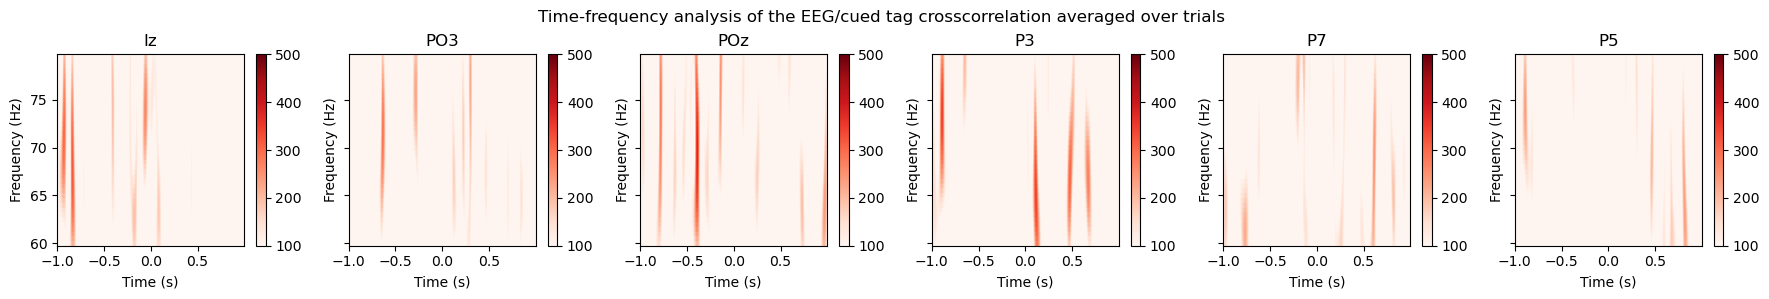

In [42]:
# Perform a time-frequency analysis of the cross-correlation
freqs = np.arange(60, 80, step = 0.5)
# Adapt the eeg info
epochs_noistag_cropped = epochs_noistag.copy().pick(freqtag_electrodes).crop(tmin=tmin_eeg, tmax=tmax_eeg-(tmax_noise-tmin_noise)).resample(sfreq)
# Do the time frequency analysis
tfr = mne.time_frequency.tfr_array_morlet(cor_with_cued, epochs_noistag_cropped.info['sfreq'], freqs, n_cycles=10)
# Store in MNE format
tfr = mne.time_frequency.EpochsTFRArray(epochs_noistag_cropped.info, np.array([tfr[:,:,:,:-1].mean(axis=0)]), epochs_noistag_cropped.times, freqs)

# Plot
fig, axes = plt.subplots(1, len(freqtag_electrodes), figsize=(18, 3), sharey = True) 
axes = axes.flatten() 
channels = epochs_noistag_cropped.info['ch_names']
for e, (channel, ax) in enumerate(zip(channels, axes)):
    tfr.plot(
        [channel],
        baseline=(None,0),
        vlim=(100, 500),
        axes=ax,
        colorbar=True,
        show=False 
    )
    ax.set_title(channel) 
plt.tight_layout()
plt.suptitle('Time-frequency analysis of the EEG/cued tag crosscorrelation averaged over trials')
plt.show()



### 1.1 Comparing max cross-correlation pre vs post cue

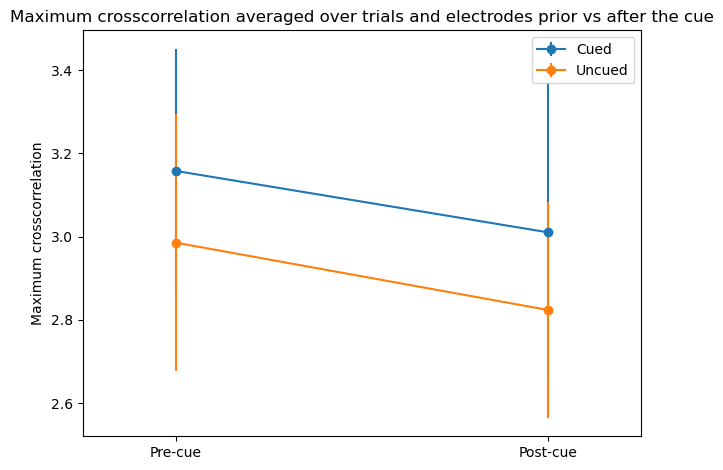

In [43]:
cor_with_cued = np.concatenate([cor_with_cued_for_cuedR,cor_with_cued_for_cuedL])
cor_with_uncued = np.concatenate([cor_with_uncued_for_cuedR,cor_with_uncued_for_cuedL])


max_precue_cued = normalize_per_trial(np.mean(cor_with_cued, axis=0))[:,:int(times.max()*sfreq)].max(axis=-1)
max_postcue_cued = normalize_per_trial(np.mean(cor_with_cued, axis=0))[:,-int(times.max()*sfreq):].max(axis=-1)
plt.errorbar(x=[0,1], y=[np.mean(max_precue_cued), np.mean(max_postcue_cued)],
                yerr=[np.std(max_precue_cued), np.std(max_postcue_cued)], fmt='o-', label='Cued')
max_precue_uncued = normalize_per_trial(np.mean(cor_with_uncued, axis=0))[:,:int(times.max()*sfreq)].max(axis=-1)
max_postcue_uncued = normalize_per_trial(np.mean(cor_with_uncued, axis=0))[:,-int(times.max()*sfreq):].max(axis=-1)
plt.errorbar(x=[0,1], y=[np.mean(max_precue_uncued), np.mean(max_postcue_uncued)],
                yerr=[np.std(max_precue_uncued), np.std(max_postcue_uncued)], fmt='o-', label='Uncued')
                        
plt.xticks([0,1],['Pre-cue', 'Post-cue'])
plt.title('Maximum crosscorrelation averaged over trials and electrodes prior vs after the cue')
plt.legend()
plt.ylabel('Maximum crosscorrelation')
plt.xlim(-.25, 1.25)
plt.tight_layout()

In [44]:
# Export for group analysis
crosscor_prepost = {}
crosscor_prepost['cued_pre'] = normalize_per_trial(cor_with_cued.mean(axis=0))[:,:cor_with_cued.shape[-1]//2+1].max(axis=-1)
crosscor_prepost['cued_post'] = normalize_per_trial(cor_with_cued.mean(axis=0))[:,cor_with_cued.shape[-1]//2:].max(axis=-1)
crosscor_prepost['uncued_pre'] = normalize_per_trial(cor_with_uncued.mean(axis=0))[:,:cor_with_uncued.shape[-1]//2+1].max(axis=-1)
crosscor_prepost['uncued_post'] = normalize_per_trial(cor_with_uncued.mean(axis=0))[:,cor_with_uncued.shape[-1]//2:].max(axis=-1)
crosscor_prepost['uncued_post'] 
crosscor_prepost_df = pd.DataFrame(crosscor_prepost)
crosscor_prepost_df = crosscor_prepost_df.melt()
crosscor_prepost_df[['cued', 'prepost']] = crosscor_prepost_df['variable'].str.split('_', expand=True)
crosscor_prepost_df = crosscor_prepost_df.drop('variable', axis=1)
crosscor_prepost_df.to_csv('files/A1_crosscor_prepost.csv',index=False)

### 1.2 Comparing max cross-correlation on displayed trial vs others

In [45]:
tmin_eeg, tmax_eeg = 0, epochs_noistag.tmax
tmin_noise, tmax_noise = 0, 2

# First for left cued side
trials = epochs_noistag.metadata['trial_number'][epochs_noistag['cued_side == 0'].selection]
# (cued, uncued), trial, elec, time
trial_crosscorr_matL = np.zeros((2, len(trials), len(trials), len(freqtag_electrodes), int((tmax_eeg-tmax_noise)*sfreq)+1))

for trial_idx, trial in enumerate(trials):
    trial_noise = copy.deepcopy(noise_stims_tr)
    # Repeat the two noise sequences across all trials 
    trial_noise = np.tile(trial_noise[trial], (len(noise_stims_tr),1, 1))
    # Perform cross-correlation on the repeated noise and all eeg trials
    cor_with_cued_for_cuedL, cor_with_uncued_for_cuedL, idx_cuedL, times = cross_cor_nois(epochs_fun = epochs_noistag, noise=trial_noise, \
        display_side_cued_tag = 'left', electrodes=freqtag_electrodes, \
        sampling_freq = sfreq, tmin_eeg=tmin_eeg, tmax_eeg=tmax_eeg, \
        tmin_noise = tmin_noise, tmax_noise = tmax_noise)
    
    # Record trial result for cued and uncued
    trial_crosscorr_matL[0, trial_idx, :, :, :] = cor_with_cued_for_cuedL[:, :, :]
    trial_crosscorr_matL[1, trial_idx, :, :, :] = cor_with_uncued_for_cuedL[:, :, :]

# For right cued side
trials = epochs_noistag.metadata['trial_number'][epochs_noistag['cued_side == 1'].selection]
trial_crosscorr_matR = np.zeros((2, len(trials), len(trials), len(freqtag_electrodes), int((tmax_eeg-tmax_noise)*sfreq)+1))

for trial_idx, trial in enumerate(trials):
    trial_noise = copy.deepcopy(noise_stims_tr)
    # Repeat the two noise sequences across all trials 
    trial_noise = np.tile(trial_noise[ trial], (len(noise_stims_tr),1, 1))
    # Perform cross-correlation on the repeated noise and all eeg trials
    cor_with_cued_for_cuedR, cor_with_uncued_for_cuedR, idx_cuedR, times = cross_cor_nois(epochs_fun = epochs_noistag, noise=trial_noise, \
        display_side_cued_tag = 'right', electrodes=freqtag_electrodes,  \
        sampling_freq = sfreq, tmin_eeg=tmin_eeg, tmax_eeg=tmax_eeg, \
        tmin_noise = tmin_noise, tmax_noise = tmax_noise)
    
    # Record trial result for cued and uncued
    trial_crosscorr_matR[0, trial_idx, :, :, :] = cor_with_cued_for_cuedR[:, :, :]
    trial_crosscorr_matR[1, trial_idx, :, :, :] = cor_with_uncued_for_cuedR[:, :, :]

/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.us

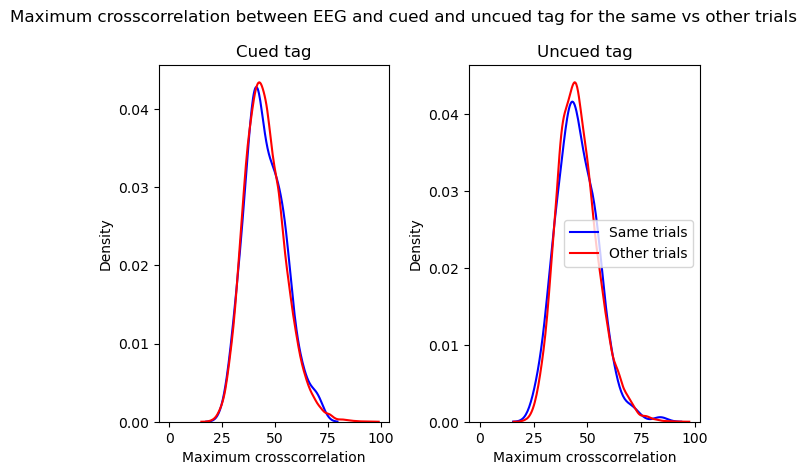

In [46]:
fig, ax = plt.subplots(1,2)
# Average cor over best frequency tagging electrodes, then extract the max for each trial
trialL = np.mean(trial_crosscorr_matL[0][:, :, :,:], axis=2).max(axis=-1)
trialR = np.mean(trial_crosscorr_matR[0][:, :, :,:], axis=2).max(axis=-1)

# Group cor with EEG from the trial VS with EEG from all other trials
same_trial_cued = np.concatenate([np.diagonal(trialL), np.diagonal(trialR)])
other_trial_cued = np.concatenate([trialL[~np.eye(trialL.shape[0], dtype=bool)],\
                           trialR[~np.eye(trialR.shape[0], dtype=bool)]])

sns.kdeplot(same_trial_cued, color='blue', ax=ax[0])
sns.kdeplot(other_trial_cued, color='red', ax=ax[0])
ax[0].plot([0],[0], label='Same trials', color='blue')
ax[0].plot([0],[0], label='Other trials', color='red')
ax[0].set_xlabel('Maximum crosscorrelation')
ax[0].set_title('Cued tag')
plt.legend()

# Average cor over best frequency tagging electrodes, then extract the max for each trial
trialL = np.mean(trial_crosscorr_matL[1][:, :, :,:], axis=2).max(axis=-1)
trialR = np.mean(trial_crosscorr_matR[1][:, :, :,:], axis=2).max(axis=-1)

# Group cor with EEG from the trial VS with EEG from all other trials
same_trial_uncued = np.concatenate([np.diagonal(trialL), np.diagonal(trialR)])
other_trial_uncued = np.concatenate([trialL[~np.eye(trialL.shape[0], dtype=bool)],\
                           trialR[~np.eye(trialR.shape[0], dtype=bool)]])

sns.kdeplot(same_trial_uncued, color='blue', ax=ax[1])
sns.kdeplot(other_trial_uncued, color='red', ax=ax[1])
ax[1].plot([0],[0], label='Same trials', color='blue')
ax[1].plot([0],[0], label='Other trials', color='red')
ax[1].set_title('Uncued tag')
ax[1].set_xlabel('Maximum crosscorrelation')
plt.suptitle('Maximum crosscorrelation between EEG and cued and uncued tag for the same vs other trials')
plt.legend()
plt.tight_layout()

In [47]:
# Export for group analysis
crosscor_sameother = {}
#Adjust different number of trials
same_trial_cued_adj = np.zeros(len(other_trial_cued))*np.nan
same_trial_uncued_adj = np.zeros(len(other_trial_uncued))*np.nan
same_trial_cued_adj[:len(same_trial_cued)] = same_trial_cued 
same_trial_uncued_adj[:len(same_trial_uncued)] = same_trial_uncued 
crosscor_sameother['same_cued'] = same_trial_cued_adj
crosscor_sameother['same_uncued'] = same_trial_uncued_adj
crosscor_sameother['other_cued'] = other_trial_cued
crosscor_sameother['other_uncued'] = other_trial_uncued
crosscor_sameother_df = pd.DataFrame(crosscor_sameother)
crosscor_sameother_df = crosscor_sameother_df.melt()
crosscor_sameother_df[['trial_type', 'cued']] = crosscor_sameother_df['variable'].str.split('_', expand=True)
crosscor_sameother_df = crosscor_sameother_df.drop('variable', axis=1)
crosscor_sameother_df.to_csv('files/A1_crosscor_sameother_cueduncued.csv',index=False)

## 2. Cross-correlation of the averaged tags (tag duration from 0 to 2s)

The EEG from -1 to 2.3s is correlated with the tags from 0 to 2s (positive time lag up to 300ms). 
All trials, including the 20% where there was a target are included. 
The EEG is correlated with the average of the two displayed tags instead of each tag.
Crosscorrelation is computed for all posterior electrodes then allows to select the best.

Text(0, 0.5, 'Cor EEG/tag')

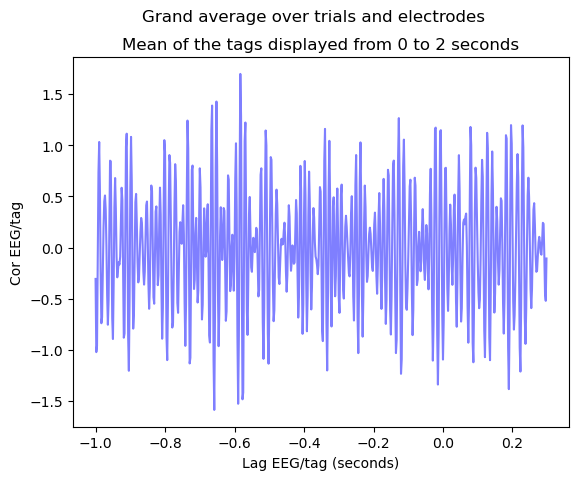

In [48]:
sfreq = 480 # EEG and tag 
tmin_eeg, tmax_eeg = -1, epochs_noistag.tmax
tmin_noise, tmax_noise = 0, 2

cor_with_avg_for_cuedR, cor_with_uncued_for_cuedR, idx_cuedR, times = \
    cross_cor_nois(epochs_fun = epochs_noistag, noise=noise_stims_tr, \
    display_side_cued_tag = 'right', electrodes = relevant_electrodes,\
    sampling_freq = sfreq, tmin_eeg=tmin_eeg, tmax_eeg=tmax_eeg, tmin_noise = tmin_noise, tmax_noise = tmax_noise,
    mean_tags = True)

cor_with_avg_for_cuedL, cor_with_uncued_for_cuedL, idx_cuedL, times = \
    cross_cor_nois(epochs_noistag, noise_stims_tr, 'left', electrodes = relevant_electrodes,\
    sampling_freq = sfreq, tmin_eeg=tmin_eeg, tmax_eeg=tmax_eeg, tmin_noise = tmin_noise, tmax_noise = tmax_noise,
    mean_tags = True)

cor_with_avg = np.concatenate([cor_with_avg_for_cuedR,cor_with_avg_for_cuedL])


# Plot
fig, ax = plt.subplots(1,1)

ax.plot(times,cor_with_avg.mean(axis=(0,1)).T, color='blue', alpha=.5)


ax.set_title('Mean of the tags displayed from 0 to 2 seconds');
plt.suptitle('Grand average over trials and electrodes');
ax.set_xlabel('Lag EEG/tag (seconds)')
ax.set_ylabel('Cor EEG/tag')

In [49]:
# Export for group visualization
# First average over trials, normalize the crosscorrelation, then average over electrodes
cor_with_avg_norm = normalize_per_trial(cor_with_avg.mean(axis=0)).mean(axis=0)

crosscorr_time = pd.DataFrame({'Time':times,
              'value':cor_with_avg_norm})
crosscorr_time.to_csv('files/A1_crosscorr_time_averagedtag.csv')


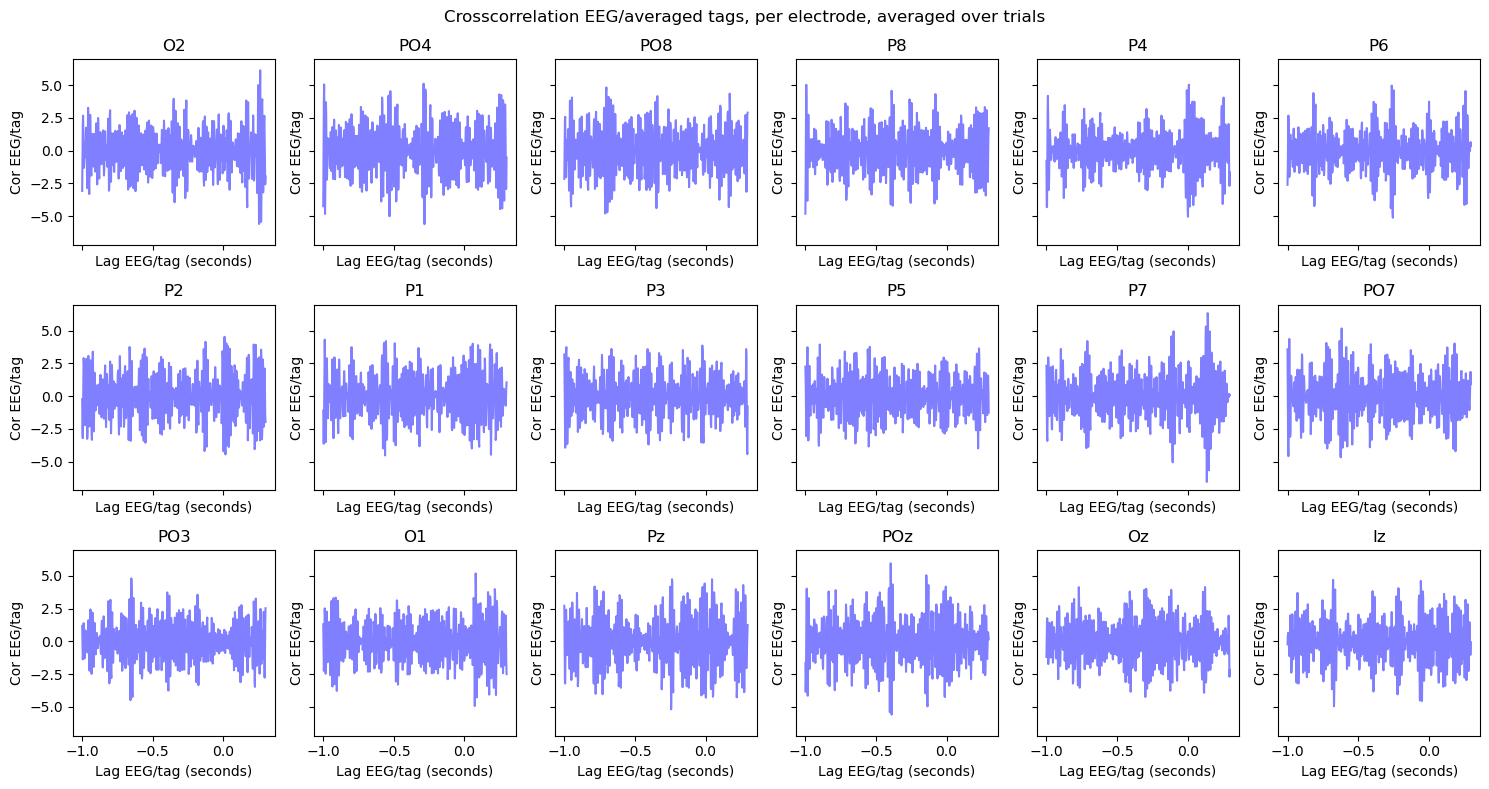

In [50]:
cor_with_avg = np.concatenate([cor_with_avg_for_cuedR,cor_with_avg_for_cuedL])

fig, axs = plt.subplots(3, 6, figsize=(15, 8), sharey=True, sharex=True)
for e, elec in enumerate(relevant_electrodes):
    ax = axs[e // 6, e % 6]
    ax.plot(times, cor_with_avg[:, e, :].mean(axis=0).T, color='blue', alpha=0.5)
    ax.set_title(elec)
    ax.set_xlabel('Lag EEG/tag (seconds)')
    ax.set_ylabel('Cor EEG/tag')
plt.suptitle('Crosscorrelation EEG/averaged tags, per electrode, averaged over trials')
plt.tight_layout()
plt.show()


/tmp/ipykernel_15649/640358798.py:6: FutureWarning: The default value of `zero_mean` will change from `False` to `True` in version 1.8. Set the value explicitly to avoid this warning.
  tfr = mne.time_frequency.tfr_array_morlet(cor_with_avg, epochs_noistag_cropped.info['sfreq'], freqs, n_cycles=10)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    3.6s


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


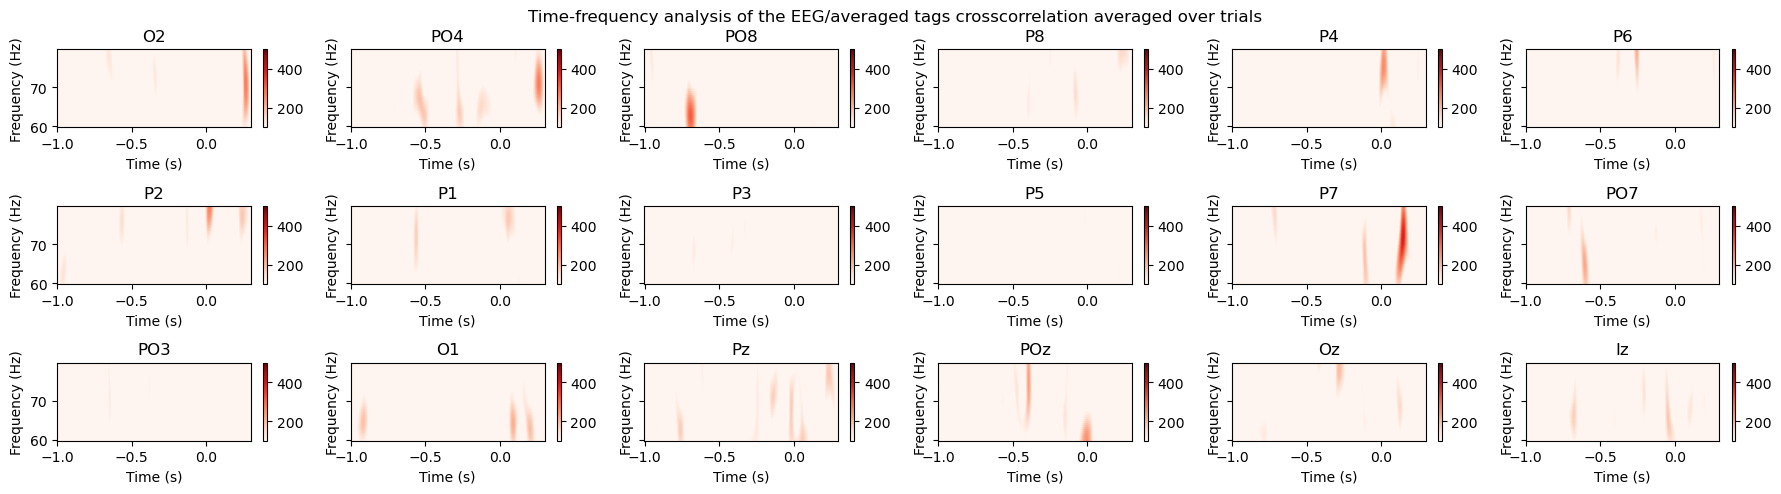

In [51]:
# Perform a time-frequency analysis of the cross-correlation
freqs = np.arange(60, 80, step = 0.5)
# Adapt the eeg info
epochs_noistag_cropped = epochs_noistag.copy().crop(tmin=tmin_eeg, tmax=tmax_eeg-(tmax_noise-tmin_noise)).resample(sfreq)
# Do the time frequency analysis
tfr = mne.time_frequency.tfr_array_morlet(cor_with_avg, epochs_noistag_cropped.info['sfreq'], freqs, n_cycles=10)
# Store in MNE format
tfr = mne.time_frequency.EpochsTFRArray(epochs_noistag_cropped.info, np.array([tfr.mean(axis=0)]), epochs_noistag_cropped.times, freqs)

# Plot
fig, axes = plt.subplots(3, 6, figsize=(18, 5), sharey = True) 
axes = axes.flatten() 
channels = epochs_noistag_cropped.info['ch_names']
for e, (channel, ax) in enumerate(zip(channels, axes)):
    tfr.plot(
        [channel],
        baseline=(None,0),
        vlim=(100, 500),
        axes=ax,
        colorbar=True,
        show=False 
    )
    ax.set_title(channel) 
plt.tight_layout()
plt.suptitle('Time-frequency analysis of the EEG/averaged tags crosscorrelation averaged over trials')
plt.show()

In [52]:
# Select electrodes that have a crosscorrelation max higher than 3.7 standard deviations after stimulus onset
elec_max = normalize_per_trial(cor_with_avg.mean(axis=0))[:,-int(times.max()*sfreq):].max(axis=-1) > 3.7
best_indices = [i for i in range(len(elec_max)) if elec_max[i]]
best_electrodes = [epochs_noistag.info['ch_names'][i] for i in best_indices]
epochs_noistag = epochs_noistag.pick(best_electrodes)
best_electrodes

['O2', 'P7']

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


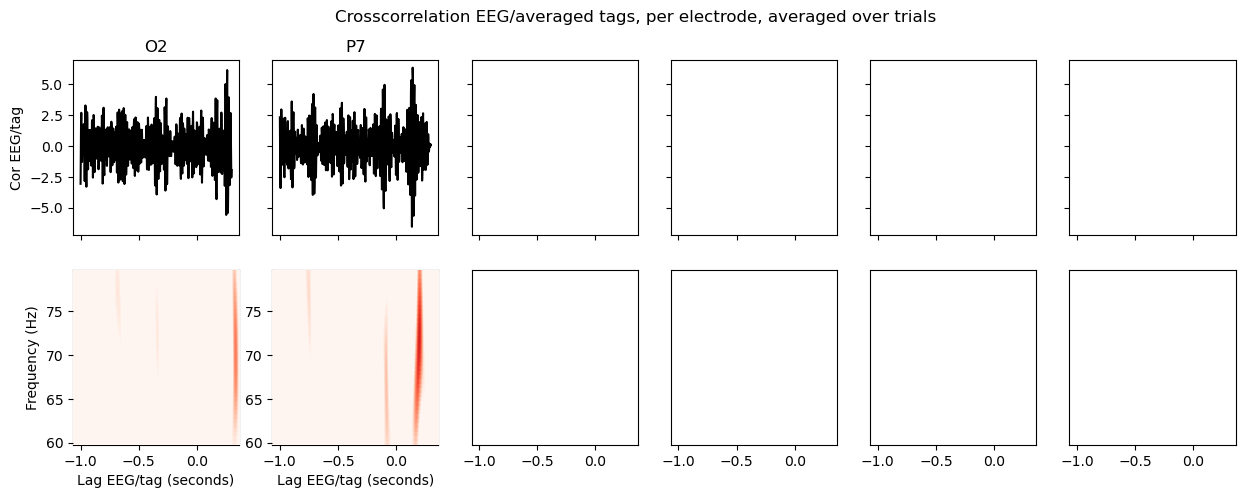

In [55]:
cor_with_avg = np.concatenate([cor_with_avg_for_cuedR,cor_with_avg_for_cuedL])

fig, axs = plt.subplots(2,6, figsize=(15, 5), sharey='row', sharex=True)
for e, elec in enumerate(best_electrodes):
    elec_idx = np.where(np.array(epochs.info['ch_names']) == elec)[0]
    axs[0,e].plot(times, cor_with_avg[:, elec_idx, :].mean(axis=0).T, color='black')
    axs[0,e].set_title(elec)

    tfr_axes = fig.add_subplot(2, 6, e + 7, frame_on=False)
    b = tfr.plot(
        [elec],
        baseline=(None, 0),
        vlim=(100, 500),
        axes=tfr_axes,
        colorbar=False,
        show=False
    )
    tfr_axes.set_xlabel('')
    if e != 0:
        tfr_axes.set_ylabel('')
    tfr_axes.tick_params(left=True, labelleft=True, bottom=False, labelbottom=False)
    axs[1,e].set_xlabel('Lag EEG/tag (seconds)')
    axs[1,e].set_yticks([])
axs[0,0].set_ylabel('Cor EEG/tag')
plt.suptitle('Crosscorrelation EEG/averaged tags, per electrode, averaged over trials')
# plt.tight_layout()
plt.show()


In [54]:
# Export for group visualization
# First average over trials, normalize the crosscorrelation, then average over best electrodes
cor_with_avg_norm = normalize_per_trial(cor_with_avg[:,np.isin(np.array(epochs.info['ch_names']),best_electrodes),:].mean(axis=0)).mean(axis=0)

crosscorr_time = pd.DataFrame({'Time':times,
              'value':cor_with_avg_norm})
crosscorr_time.to_csv('files/A1_crosscorr_time_avgtag.csv')

### 2.1 Comparing cross-correlation pre vs post cue

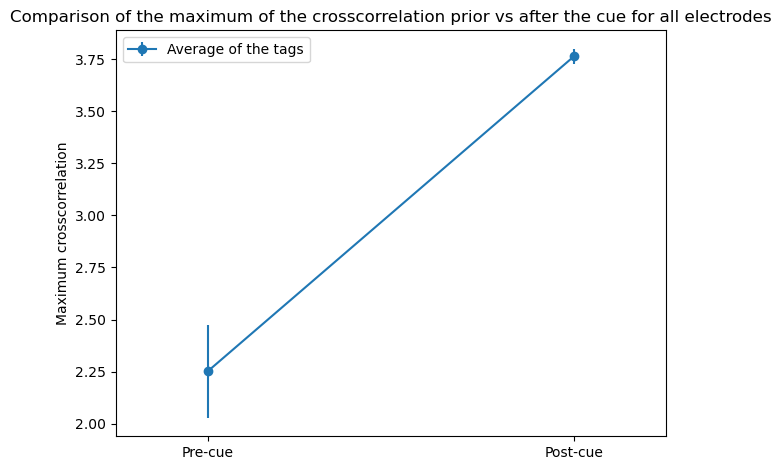

In [21]:
max_precue_avg = normalize_per_trial(np.mean(cor_with_avg, axis=0))[best_indices,:int(times.max()*sfreq)].max(axis=-1)
max_postcue_avg = normalize_per_trial(np.mean(cor_with_avg, axis=0))[best_indices,-int(times.max()*sfreq):].max(axis=-1)
plt.errorbar(x=[0,1], y=[np.mean(max_precue_avg), np.mean(max_postcue_avg)],
                yerr=[np.std(max_precue_avg), np.std(max_postcue_avg)], fmt='o-', label='Average of the tags')
                        
plt.xticks([0,1],['Pre-cue', 'Post-cue'])
plt.title('Comparison of the maximum of the crosscorrelation prior vs after the cue for all electrodes')
plt.legend()
plt.ylabel('Maximum crosscorrelation')
plt.xlim(-.25, 1.25)
plt.tight_layout()

### 2.2 Comparing cross-correlation on displayed trial vs others

In [23]:
tmin_eeg, tmax_eeg = 0, epochs_noistag.tmax
tmin_noise, tmax_noise = 0, 2

# First for left cued side
trials = epochs_noistag.metadata['trial_number'][epochs_noistag['cued_side == 0'].selection]
# (cued, uncued), trial, elec, time
trial_crosscorr_matL = np.zeros((len(trials), len(trials), len(best_indices), int((tmax_eeg-tmax_noise)*sfreq)+1))

for trial_idx, trial in enumerate(trials):
    trial_noise = copy.deepcopy(noise_stims_tr)
    # Repeat the two noise sequences across all trials 
    trial_noise = np.tile(trial_noise[trial], (len(noise_stims_tr),1, 1))
    # Perform cross-correlation on the repeated noise and all eeg trials
    cor_with_averaged_for_cuedL, _, _, _ = cross_cor_nois(epochs_fun = epochs_noistag, noise=trial_noise, \
        display_side_cued_tag = 'left', electrodes=best_electrodes, \
        sampling_freq = sfreq, tmin_eeg=tmin_eeg, tmax_eeg=tmax_eeg, \
        tmin_noise = tmin_noise, tmax_noise = tmax_noise,
                                    mean_tags = True)
    # Record trial result
    trial_crosscorr_matL[trial_idx, :, :, :] = cor_with_averaged_for_cuedL[:, :, :]

# For right cued side
trials = epochs_noistag.metadata['trial_number'][epochs_noistag['cued_side == 1'].selection]
trial_crosscorr_matR = np.zeros((len(trials), len(trials), len(best_indices), int((tmax_eeg-tmax_noise)*sfreq)+1))

for trial_idx, trial in enumerate(trials):
    trial_noise = copy.deepcopy(noise_stims_tr)
    # Repeat the two noise sequences across all trials 
    trial_noise = np.tile(trial_noise[ trial], (len(noise_stims_tr),1, 1))
    # Perform cross-correlation on the repeated noise and all eeg trials
    cor_with_averaged_for_cuedR, _, _, _ = cross_cor_nois(epochs_fun = epochs_noistag, noise=trial_noise, \
        display_side_cued_tag = 'right', electrodes=best_electrodes,  \
        sampling_freq = sfreq, tmin_eeg=tmin_eeg, tmax_eeg=tmax_eeg, \
        tmin_noise = tmin_noise, tmax_noise = tmax_noise,
                                    mean_tags = True)
    # Record trial result
    trial_crosscorr_matR[trial_idx, :, :, :] = cor_with_averaged_for_cuedR[:, :, :]

/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/lea/anaconda3/envs/ads_thesis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


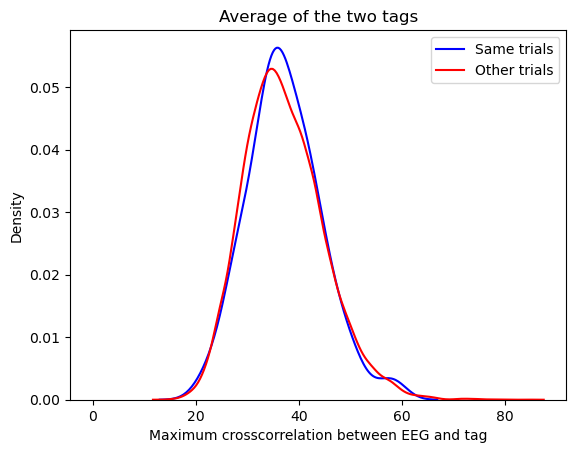

In [24]:
# Average cor over best noise tagging electrodes, then extract the max for each trial
trialL = np.mean(trial_crosscorr_matL[:, :, :,:], axis=2).max(axis=-1)
trialR = np.mean(trial_crosscorr_matR[:, :, :,:], axis=2).max(axis=-1)

# Group cor with EEG from the trial VS with EEG from all other trials
same_trial = np.concatenate([np.diagonal(trialL), np.diagonal(trialR)])
other_trial = np.concatenate([trialL[~np.eye(trialL.shape[0], dtype=bool)],\
                           trialR[~np.eye(trialR.shape[0], dtype=bool)]])

sns.kdeplot(same_trial, color='blue')
sns.kdeplot(other_trial, color='red')
plt.plot([0],[0], label='Same trials', color='blue')
plt.plot([0],[0], label='Other trials', color='red')
plt.xlabel('Maximum crosscorrelation between EEG and tag')
plt.title('Average of the two tags')
plt.legend()

In [25]:
# Export for group analysis
crosscor_sameother = {}
#Adjust different number of trials
same_trial_adj = np.zeros(len(other_trial))*np.nan
same_trial_adj[:len(same_trial)] = same_trial
crosscor_sameother['same'] = same_trial_adj
crosscor_sameother['other'] = other_trial
crosscor_sameother_df = pd.DataFrame(crosscor_sameother)
crosscor_sameother_df = crosscor_sameother_df.melt()
crosscor_sameother_df['trial_type'] = crosscor_sameother_df['variable']
crosscor_sameother_df = crosscor_sameother_df.drop('variable', axis=1)
crosscor_sameother_df.to_csv('files/A1_crosscor_sameother_averaged.csv',index=False)

## 3. Search in subwindows of the tag
The EEG from 0 to 2.3s is correlated with segments of tags (duration = 400ms, step = 100ms, positive time lag up to 1.9s). 
Crosscorrelation is computed for the best noise tagging condition electrodes.

### 3.1 Timing of the crosscorrelation with the average of the two tags
All trials, including the 20% where there was a target are included. 
The EEG is correlated with the average of the two displayed tags instead of each tag.

In [26]:
tmin_eeg, tmax_eeg = 0, epochs_noistag.tmax

# Define period of noise to analyze
start = 0
duration = .4
step = .1
end = tmax_eeg-duration
# Create a list of tag segments of duration 400ms with a step of 100ms
noise_periods = generate_noise_periods(start, end, duration, step)[::-1]

# EEG segments studied
n_bins = 20
time_bins = np.linspace(start, end, n_bins+1)*sfreq

# Matrix to store results
max_values_per_bin = np.zeros((len(noise_periods), n_bins))

# For each of the tag segments
for j, period in enumerate(noise_periods):
    tmin_noise, tmax_noise = period
    # Get the crosscorrelation sliding over the all EEG epoch
    # With the average of the two tags when the cued side was right
    cor_with_avg_for_cuedR, _, idx_avgR, times = \
        cross_cor_nois(epochs_fun = epochs_noistag, noise=noise_stims_tr, \
        display_side_cued_tag = 'right', \
        sampling_freq = sfreq, tmin_eeg=tmin_eeg, tmax_eeg=tmax_eeg, tmin_noise = tmin_noise, tmax_noise = tmax_noise,\
                      mean_tags = True)
    # With the average of the two tags when the cued side was left
    cor_with_avg_for_cuedL, _, idx_avgL, times = \
        cross_cor_nois(epochs_noistag, noise_stims_tr, 'left',\
        sampling_freq = sfreq, tmin_eeg=tmin_eeg, tmax_eeg=tmax_eeg, tmin_noise = tmin_noise, tmax_noise = tmax_noise,\
                      mean_tags = True)
    # Combine right and left cued side
    avg = np.concatenate([cor_with_avg_for_cuedR,cor_with_avg_for_cuedL])

    # Average over trials, normalize per trial, average over electrodes, then for each EEG/Tag segment lag, pick the max crosscorrelation
    for i in range(n_bins):
        start_idx = int(time_bins[i])
        end_idx = int(time_bins[i + 1])
        max_values_per_bin[j, i] = np.mean(normalize_per_trial(avg.mean(axis=0)), axis=0)[start_idx:end_idx].max()

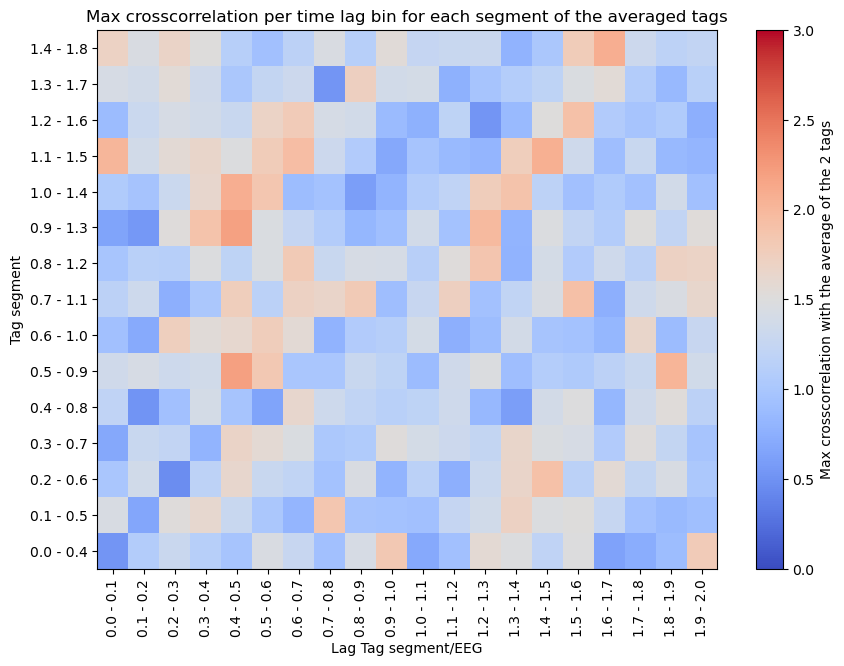

In [27]:
# Plot for the average of the two tags
fig, ax = plt.subplots(figsize=(10,7))
cax = ax.imshow(max_values_per_bin, aspect='auto', cmap='coolwarm', interpolation='nearest', vmin=0, vmax=3)

cbar = fig.colorbar(cax)
cbar.set_label('Max crosscorrelation with the average of the 2 tags')

ax.set_xlabel('Lag Tag segment/EEG')
ax.set_ylabel('Tag segment')
ax.set_title('Max crosscorrelation per time lag bin for each segment of the averaged tags')

bin_times = np.linspace(start, end, n_bins)
diff_bins = np.diff(bin_times)[0]
ax.set_xticks(np.arange(n_bins))
ax.set_xticklabels([f'{bt:.1f} - {bt+diff_bins:.1f}' for bt in bin_times], rotation=90)
ax.set_yticks(np.arange(len(noise_periods)))
ax.set_yticklabels([f'{i[0]:.1f} - {i[1]:.1f}' for i in noise_periods])

plt.show()

# Export results
bin_to_dataframe(max_values_per_bin, 'averaged_tags_A1')

### 3.2 Timing of the crosscorrelation with each of the tags (cueing effect)

In [28]:
time_bins = np.linspace(start, end, n_bins+1)*sfreq
max_values_per_bin_cued = np.zeros((len(noise_periods), n_bins))
max_values_per_bin_uncued = np.zeros((len(noise_periods), n_bins))

for j, period in enumerate(noise_periods):
    tmin_noise, tmax_noise = period
    
    cor_with_cued_for_cuedR, cor_with_uncued_for_cuedR, idx_cuedR, times = \
        cross_cor_nois(epochs_fun = epochs_noistag, noise=noise_stims_tr, \
        display_side_cued_tag = 'right',\
        sampling_freq = sfreq, tmin_eeg=tmin_eeg, tmax_eeg=tmax_eeg, tmin_noise = tmin_noise, tmax_noise = tmax_noise)
    
    cor_with_cued_for_cuedL, cor_with_uncued_for_cuedL, idx_cuedL, times = \
        cross_cor_nois(epochs_noistag, noise_stims_tr, 'left', \
        sampling_freq = sfreq, tmin_eeg=tmin_eeg, tmax_eeg=tmax_eeg, tmin_noise = tmin_noise, tmax_noise = tmax_noise)
    
    cued = np.concatenate([cor_with_cued_for_cuedR,cor_with_cued_for_cuedL])
    uncued = np.concatenate([cor_with_uncued_for_cuedR,cor_with_uncued_for_cuedL])

    for i in range(n_bins):
        start_idx = int(time_bins[i])
        end_idx = int(time_bins[i + 1])
        max_values_per_bin_cued[j, i] = np.mean(normalize_per_trial(cued.mean(axis=0)), axis=0)[start_idx:end_idx].max()
        max_values_per_bin_uncued[j, i] = np.mean(normalize_per_trial(uncued.mean(axis=0)), axis=0)[start_idx:end_idx].max()
    


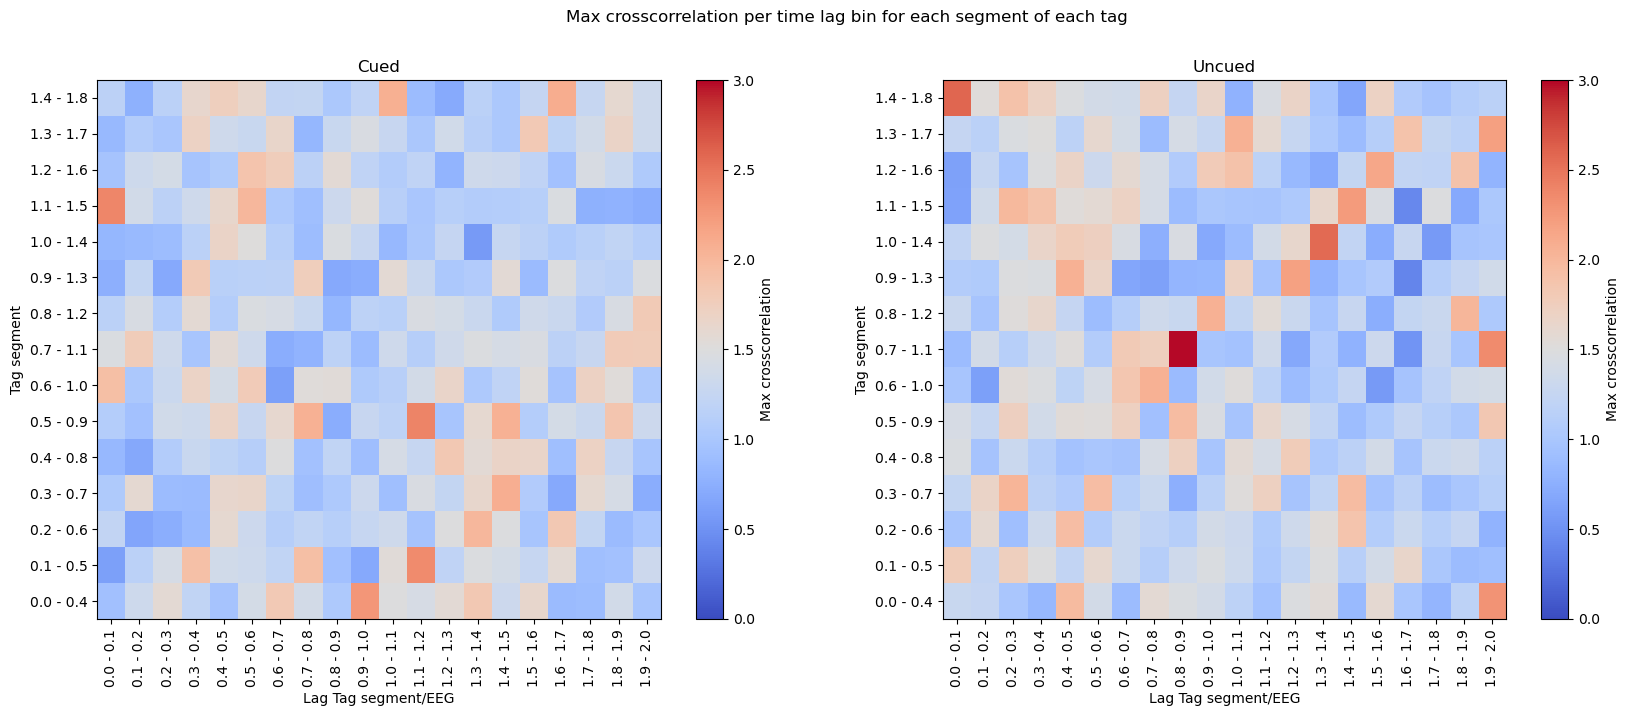

In [29]:
fig, ax = plt.subplots(1,2, figsize=(20,7), sharey=False)

cax = ax[0].imshow(max_values_per_bin_cued, aspect='auto', cmap='coolwarm', interpolation='nearest', vmin=0, vmax=3)
cbar = fig.colorbar(cax)
cbar.set_label('Max crosscorrelation')
cax = ax[1].imshow(max_values_per_bin_uncued, aspect='auto', cmap='coolwarm', interpolation='nearest', vmin=0, vmax=3)
cbar = fig.colorbar(cax)
cbar.set_label('Max crosscorrelation')

ax[0].set_xlabel('Lag Tag segment/EEG')
ax[0].set_ylabel('Tag segment')
ax[1].set_xlabel('Lag Tag segment/EEG')
ax[1].set_ylabel('Tag segment')
plt.suptitle('Max crosscorrelation per time lag bin for each segment of each tag')

bin_times = np.linspace(start, end, n_bins)
diff_bins = np.diff(bin_times)[0]

for axi in ax:
    axi.set_xticks(np.arange(n_bins))
    axi.set_xticklabels([f'{bt:.1f} - {bt+diff_bins:.1f}' for bt in bin_times], rotation=90)
    axi.set_yticks(np.arange(len(noise_periods)))
    axi.set_yticklabels([f'{i[0]:.1f} - {i[1]:.1f}' for i in noise_periods])


ax[0].set_title('Cued')
ax[1].set_title('Uncued')
plt.show()
bin_to_dataframe(max_values_per_bin_cued, 'cued_tags_with_target_A1')
bin_to_dataframe(max_values_per_bin_uncued, 'uncued_tags_with_target_A1')

### 3.3 Cueing effect on trials without targets only

In [30]:
time_bins = np.linspace(start, end, n_bins+1)*sfreq
max_values_per_bin_cued = np.zeros((len(noise_periods), n_bins))
max_values_per_bin_uncued = np.zeros((len(noise_periods), n_bins))

for j, period in enumerate(noise_periods):
    tmin_noise, tmax_noise = period
    
    cor_with_cued_for_cuedR, cor_with_uncued_for_cuedR, idx_cuedR, times = \
        cross_cor_nois(epochs_fun = epochs_noistag['target_binary == 0'], noise=noise_stims_tr, \
        display_side_cued_tag = 'right',\
        sampling_freq = sfreq, tmin_eeg=tmin_eeg, tmax_eeg=tmax_eeg, tmin_noise = tmin_noise, tmax_noise = tmax_noise)
    
    cor_with_cued_for_cuedL, cor_with_uncued_for_cuedL, idx_cuedL, times = \
        cross_cor_nois(epochs_noistag['target_binary == 0'], noise_stims_tr, 'left',\
        sampling_freq = sfreq, tmin_eeg=tmin_eeg, tmax_eeg=tmax_eeg, tmin_noise = tmin_noise, tmax_noise = tmax_noise)
    
    cued = np.concatenate([cor_with_cued_for_cuedR,cor_with_cued_for_cuedL])
    uncued = np.concatenate([cor_with_uncued_for_cuedR,cor_with_uncued_for_cuedL])

    for i in range(n_bins):
        start_idx = int(time_bins[i])
        end_idx = int(time_bins[i + 1])
        max_values_per_bin_cued[j, i] = np.mean(normalize_per_trial(cued.mean(axis=0)), axis=0)[start_idx:end_idx].max()
        max_values_per_bin_uncued[j, i] = np.mean(normalize_per_trial(uncued.mean(axis=0)), axis=0)[start_idx:end_idx].max()
    


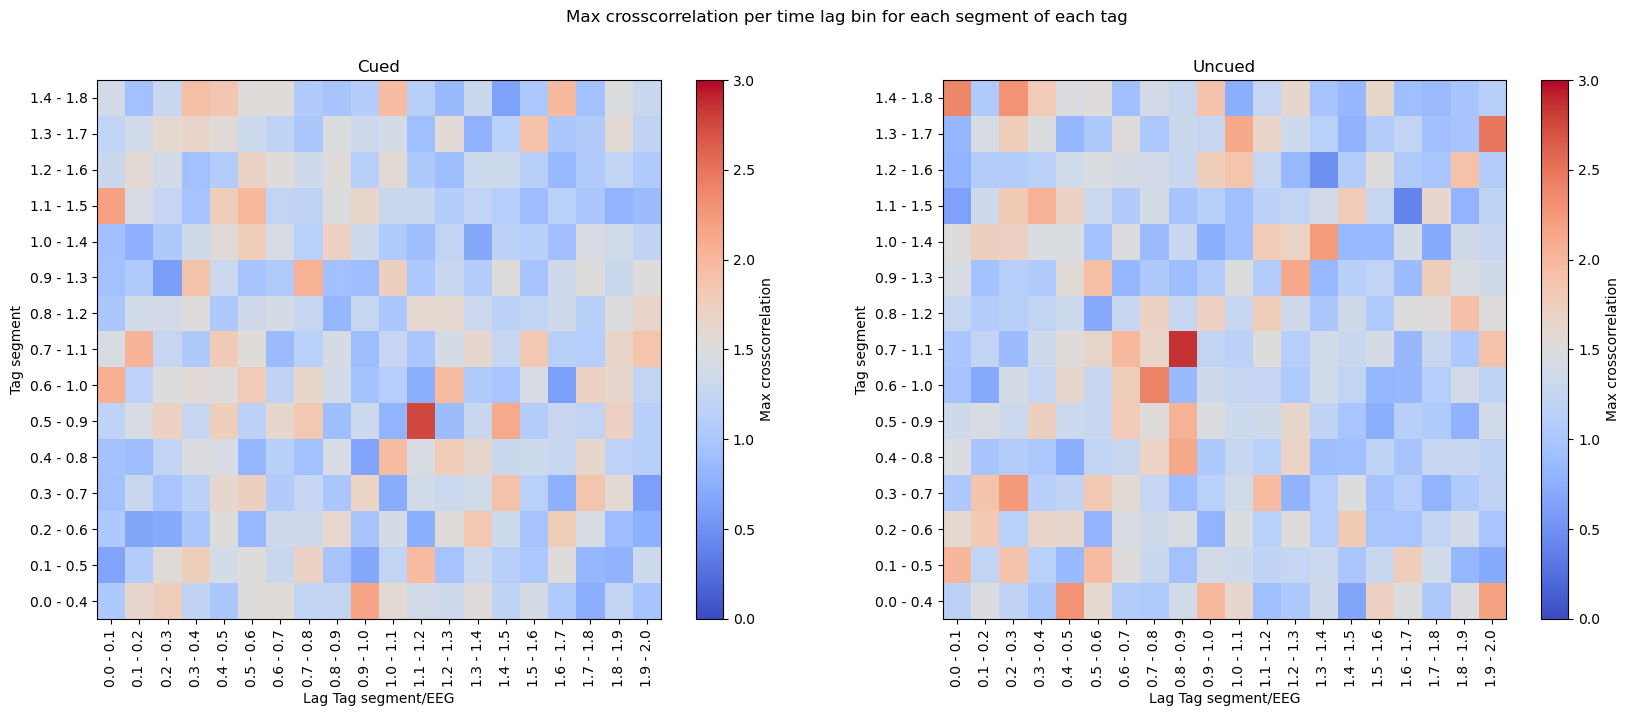

In [31]:
fig, ax = plt.subplots(1,2, figsize=(20,7), sharey=False)

cax = ax[0].imshow(max_values_per_bin_cued, aspect='auto', cmap='coolwarm', interpolation='nearest', vmin=0, vmax=3)
cbar = fig.colorbar(cax)

cbar.set_label('Max crosscorrelation')
cax = ax[1].imshow(max_values_per_bin_uncued, aspect='auto', cmap='coolwarm', interpolation='nearest', vmin=0, vmax=3)
cbar = fig.colorbar(cax)
cbar.set_label('Max crosscorrelation')

ax[0].set_xlabel('Lag Tag segment/EEG')
ax[0].set_ylabel('Tag segment')
ax[1].set_xlabel('Lag Tag segment/EEG')
ax[1].set_ylabel('Tag segment')
plt.suptitle('Max crosscorrelation per time lag bin for each segment of each tag')

bin_times = np.linspace(start, end, n_bins)
diff_bins = np.diff(bin_times)[0]

for axi in ax:
    axi.set_xticks(np.arange(n_bins))
    axi.set_xticklabels([f'{bt:.1f} - {bt+diff_bins:.1f}' for bt in bin_times], rotation=90)
    axi.set_yticks(np.arange(len(noise_periods)))
    axi.set_yticklabels([f'{i[0]:.1f} - {i[1]:.1f}' for i in noise_periods])

ax[0].set_title('Cued')
ax[1].set_title('Uncued')
plt.show()
bin_to_dataframe(max_values_per_bin_cued, 'cued_tags_without_target_A1')
bin_to_dataframe(max_values_per_bin_uncued, 'uncued_tags_without_target_A1')